In [15]:
import awswrangler  as wr
import pandas as pd
import pymysql
import datetime
import json


In [2]:
sql = """
select 23 as a 
"""

df_2 = wr.athena.read_sql_query(sql=sql, database="moyo_order")

bucket = 'moyo-mart'
table_name = 'dd' 

res = wr.s3.to_parquet(
    df=df_2,
    path=f"s3://{bucket}/{table_name}/",
    dataset=True,
    database="moyo_mart",
    table=table_name,
    mode="overwrite_partitions",
    # partition_cols=['date_ymd']
)

In [1]:
# create line plot


In [5]:
import matplotlib.pyplot as plt
# import seaborn as sns
import pandas as pd
import numpy as np
import datetime
import matplotlib.dates as mdates


In [3]:
# how to fix this?


In [10]:
import os

# Get path to `Downloads` folder in root directory
downloads_path = os.path.join(os.path.expanduser('~'), 'Downloads')

# Get `demov2.csv` file from downloads folder
file_path = os.path.join(downloads_path, 'demov2.csv')

# Open file in `read` mode
with open(file_path, 'r') as f:
    # Read file contents
    file_contents = f.read()
    print(file_contents)

is_paybooc,is_apply,is_pv,is_contract,moyo_user_id,reg_ts,fee,initial_utm_campaign,initial_utm_medium,navigation,is_family,family_total_fee,family_avg_fee,family_cnt,contract_end_df,mno,plan_name,total_panelty,disc_amt,apply_cnt,pv_cnt
1,1,1,1,204942,2023-04-30 12:08:51.000000,38396.666666666664,payment-landing,paid,affiliate_landing,0,0,0,0,40,SKT,베이직　,127640,11156,7,83
1,1,1,1,204442,2023-04-29 11:48:18.000000,120740,payment-landing,paid,affiliate_landing,0,0,0,0,31,SKT,5GX 레귤러플러스,141770,19002,1,2
1,1,1,1,202146,2023-04-27 11:29:45.000000,36700,benefit-landing,paid,affiliate_landing,0,0,0,0,13,KT,LTE 베이직,23185,7500,1,3
0,1,1,0,186112,2023-04-28 12:46:11.000000,62690,,,home,1,30800,10266.666666666666,3,0,KT,데이터ON 비디오,0,8000,2,17
1,1,1,0,204277,2023-04-29 06:33:33.000000,33153.333333333336,benefit-landing,paid,affiliate_landing,0,0,0,0,0,KT,LTE 베이직,0,0,1,15
1,1,1,1,202466,2023-04-27 15:15:31.000000,190736.66666666666,payment-landing,paid,affiliate_landing,0,0,0,0,30,SKT,5GX스탠다드+다이렉트플랜,

In [11]:
# create sampe dateframe for plot
df = pd.DataFrame({'date': ['2021-01-01', '2021-01-02', '2021-01-03', '2021-01-04', '2021-01-05'],
                     'value': [1, 2, 3, 4, 5]})
df['date'] = pd.to_datetime(df['date'])
df = df.set_index('date')


In [12]:
df

,value
date,
2021-01-01,1
2021-01-02,2
2021-01-03,3
2021-01-04,4
2021-01-05,5


In [13]:
# create ecdf function
def ecdf(data):
    """Compute ECDF for a one-dimensional array of measurements."""
    # Number of data points: n
    n = len(data)
    # x-data for the ECDF: x
    x = np.sort(data)
    # y-data for the ECDF: y
    y = np.arange(1, n+1) / n
    return x, y

In [ ]:
#draw star with for loop
for i in range(1, 6):
    plt.plot(df['value'], marker='.', linestyle='none')
    plt.margins(0.02)
    plt.xlabel('value')
    plt.ylabel('ECDF')
    plt.title('ECDF plot')
    plt.show() 

In [26]:
sql = """
select * 
from moyo_logs.user_behavior_logs
where 1=1 
and date_ymd between '2023-01-01' and '2023-01-14'
limit 100 
"""

df_2 = wr.athena.read_sql_query(sql=sql, database="moyo_order")

In [21]:
df_2.head()

,client_access_time,uuid,user_id,user_agent,ip,device,app_version,navigation,category,object_section,object_type,object_id,object_position,object_name,object_url,referer,external_referer_url,user_properties,event_properties,date_ymd
0,2023-01-01 00:00:32,af505828-fcaa-41b8-937b-58b20366f50a,<NA>,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,39.119.78.65,"Web (Desktop, Windows)",<NA>,search_plans,impression,plan_list,plan,10325,1,인스유심 스트롱 11GB+,<NA>,<NA>,https://www.google.com/,"{""client_side_set_cookie"":null,""is_penalty_sco...","{""is_rocket"":true,""mvno"":""insmobile"",""mno"":""LG...",2023-01-01
1,2023-01-01 00:00:31,af505828-fcaa-41b8-937b-58b20366f50a,<NA>,Mozilla/5.0 (Windows NT 10.0; Win64; x64) Appl...,39.119.78.65,"Web (Desktop, Windows)",<NA>,search_plans,pageview,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,https://www.google.com/,"{""client_side_set_cookie"":null,""is_penalty_sco...","{""path_url"":""https://www.moyoplan.com/plans""}",2023-01-01
2,2023-01-01 00:00:30,b77647b4-50ab-4e34-9a9c-9fba02b26f15,26137,Mozilla/5.0 (iPhone; CPU iPhone OS 16_1_1 like...,61.77.59.113,"Web (Mobile, iOS)",<NA>,qna_home,click,<NA>,qna_post,449e5932,<NA>,알뜰>다른 알뜰 갈아탈때마다 유심을 새로 구입해야하나요?,<NA>,qna_post_detail,https://www.moyoplan.com/mypage,"{""client_side_set_cookie"":null,""is_penalty_sco...","{""path_url"":""https://www.moyoplan.com/communit...",2023-01-01
3,2023-01-01 00:00:26,b77647b4-50ab-4e34-9a9c-9fba02b26f15,26137,Mozilla/5.0 (iPhone; CPU iPhone OS 16_1_1 like...,61.77.59.113,"Web (Mobile, iOS)",<NA>,qna_home,impression,<NA>,qna_post,9f7589e9,<NA>,유심을 매번 사야 하나요?,<NA>,qna_post_detail,https://www.moyoplan.com/mypage,"{""client_side_set_cookie"":null,""is_penalty_sco...","{""view_count"":360,""answer_count"":2,""path_url"":...",2023-01-01
4,2023-01-01 00:00:26,b77647b4-50ab-4e34-9a9c-9fba02b26f15,26137,Mozilla/5.0 (iPhone; CPU iPhone OS 16_1_1 like...,61.77.59.113,"Web (Mobile, iOS)",<NA>,qna_home,impression,<NA>,qna_post,c9e54f5e,<NA>,원칩 유심 재사용 관련,<NA>,qna_post_detail,https://www.moyoplan.com/mypage,"{""client_side_set_cookie"":null,""is_penalty_sco...","{""view_count"":727,""answer_count"":1,""path_url"":...",2023-01-01


In [34]:
# create daily trend with df_2
df_2['date_ymd'] = pd.to_datetime(df_2['date_ymd'])
df_2 = df_2.set_index('date_ymd')
df_2 = df_2.sort_index()
df_2 = df_2.resample('D').sum()
df_2 = df_2.reset_index()
df_2.head()


,date_ymd,user_id,object_position
0,2023-01-02,2375832,10671


In [35]:
df_2


,date_ymd,user_id,object_position
0,2023-01-02,2375832,10671


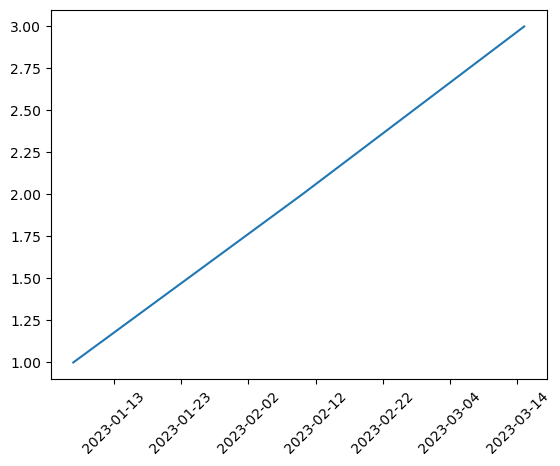

In [41]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from datetime import datetime

# Your date strings
date_strings = ['2023-01-07', '2023-02-10', '2023-03-15']

# Convert date strings to datetime objects
dates = [datetime.strptime(date_str, '%Y-%m-%d') for date_str in date_strings]

# Convert datetime objects to numerical format used by Matplotlib
num_dates = mdates.date2num(dates)

# Your data (replace this with your actual data)
y_data = [1, 2, 3]

# Plot the data
fig, ax = plt.subplots()
ax.plot(num_dates, y_data)

# Format the x-axis to display dates
ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
plt.xticks(rotation=45)

# Show the plot
plt.show()


In [42]:
sql = """
select *
from moyo_logs.user_behavior_logs
where 1=1
and date_ymd between '2023-01-01' and '2023-01-14'
limit 100
"""
df = wr.athena.read_sql_query(sql=sql, database="moyo_order")

In [43]:
sql

"\nselect *\nfrom moyo_logs.user_behavior_logs\nwhere 1=1\nand date_ymd between '2023-01-01' and '2023-01-14'\nlimit 100\n"

# markdown